In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import math
from termcolor import colored
plt.style.use("seaborn")

In [2]:
KSI_TO_KPA = 6.89476
IN_TO_M = 0.0254
FT_TO_M = 0.3048
LITRES_TO_M3 = 0.001
HP_TO_W = 745.7
G = 9.81                        # m/s^2
RHO = 1000                      # kg/m^3
GAMMA = 9.81                    # kN/m^3
PIPE_DIAMETER = 0.0762          # m
SCALE_PIPE_LENGTH = 3200        # m
MAX_PRESSURE = 448.1594/GAMMA   # m 
MIN_PRESSURE = 275.7904/GAMMA   # m
MIN_FLOW = 0.185                # m^3/s
ENERGY_COST = 0.077        # $/kWh

In [3]:
MIN_PRESSURE

28.11319062181447

In [4]:
xlsx = pd.ExcelFile("./lab3_spreadsheet.xlsx")

PN - Pumps with variable speeds
PP - Pumps in Parallel

In [5]:
pipe_info = pd.read_excel(xlsx, "pipe_info")
pipe_info["pipe_diameter"] = pipe_info["pipe_diameter"].apply(lambda x: round(x*IN_TO_M, 4))
pipe_info["pipe_cost"] = pipe_info["pipe_cost"].apply(lambda x: x/FT_TO_M)
pipe_info.set_index("pipe_diameter", inplace=True)
pipe_info

,pipe_cost
pipe_diameter,
0.1016,4.330709
0.1524,8.989501
0.2032,15.091864
0.3048,28.018373
0.3810,53.543307
0.4572,64.370079
0.6096,110.170604
0.7620,175.524934
0.9144,204.461942


In [6]:
pump_info = pd.read_excel(xlsx, "pump_info")
pump_info["pump_diameter"] = pump_info["pump_diameter"].apply(lambda x: round(x*IN_TO_M, 4))
pump_info.set_index("pump_diameter", inplace=True)
pump_info

,pump_cost,pump_name
pump_diameter,,
0.1143,970,ChemFlo 4-4
0.1270,1090,ChemFlo 4-5
0.1397,1185,ChemFlo 4-5-2
0.2159,1850,ChemFlo 4-8
0.2349,2000,ChemFlo 4-9
0.2540,2150,ChemFlo 4-10
0.2603,2200,ChemFlo 4-10
0.2794,2400,ChemFlo 4-11
0.3048,2600,ChemFlo 4-12


In [7]:
motor_info = pd.read_excel(xlsx, "motor_info")
motor_info["motor_hp"] = motor_info["motor_hp"].apply(lambda x: round(x*HP_TO_W, 2))
motor_info

,motor_speed,motor_hp,motor_price,motor_part_number,motor_name
0,3600,2237.10,195,MTC-003-3BD36,AC MOTOR 3HP 3600RPM 208-230/460VAC 3PH 182T
1,1800,2237.10,191,MTC-003-3BD18,AC MOTOR 3HP 1800RPM 208-230/460VAC 3PH 182T
2,1200,2237.10,300,MTC-003-3BD12,AC MOTOR 3HP 1200RPM 208-230/460VAC 3PH 213T
3,3600,3728.50,250,MTC-005-3BD36,AC MOTOR 5HP 3600RPM 208-230/460VAC 3PH 184T
4,1800,3728.50,216,MTC-005-3BD18,AC MOTOR 5HP 1800RPM 208-230/460VAC 3PH 184T
5,1200,3728.50,380,MTC-005-3BD12,AC MOTOR 5HP 1200RPM 208-230/460VAC 3PH 215T
6,3600,5592.75,335,MTC-7P5-3BD36,AC MOTOR 7.5HP 3600RPM 208-230/460VAC 3PH 213T
7,1800,5592.75,312,MTC-7P5-3BD18,AC MOTOR 7.5HP 1800RPM 208-230/460VAC 3PH 213T
8,1200,5592.75,470,MTC-7P5-3BD12,AC MOTOR 7.5HP 1200RPM 208-230/460VAC 3PH 254T
9,3600,7457.00,385,MTC-010-3BD36,AC MOTOR 10HP 3600RPM 208-230/460VAC 3PH 215T


In [8]:
def preprocess(origin_dataset: pd.DataFrame, pipe_diameter: float):
    dataset = origin_dataset.copy(deep=True)
    dataset["correct_current"] = dataset["current_p1"].apply(lambda x: (x**2*(-0.0347)) + (1.39*x)+0.0266)
    dataset["input_power"] = dataset.apply(lambda rows: rows["correct_current"] * rows["voltage"], axis=1)
    dataset["pressure_p1"] = dataset["pressure_p1"].apply(lambda x: x*KSI_TO_KPA)
    dataset["pressure_head_p1"] = dataset["pressure_p1"].apply(lambda x: x/GAMMA)
    dataset["flow_p1"] = dataset["flow_p1"].apply(lambda x: x*LITRES_TO_M3)
    dataset["velocity_p1"] = dataset["flow_p1"].apply(lambda x: x/(math.pi*(pipe_diameter/2)**2))
    dataset["velocity_head_p1"] = dataset["velocity_p1"].apply(lambda x: (x**2)/(2*G))
    dataset["total_pump_head"] = dataset["velocity_head_p1"] + dataset["pressure_head_p1"]
    dataset["fluid_power"] = dataset.apply(lambda rows: (rows["total_pump_head"]*rows["flow_p1"]*RHO*G), axis=1)
    dataset["efficiency"] = dataset.apply(lambda rows: rows["fluid_power"]/rows["input_power"], axis=1)
    return dataset

In [9]:
def load(excelFile, analysisSheets):
    dfs = {}
    for sheetName in analysisSheets:
        cur_df = pd.read_excel(excelFile, sheetName)
        dfs[sheetName] = preprocess(cur_df, PIPE_DIAMETER)
    return dfs

In [10]:
# pn_names = ["PN_3450", "PN_3214", "PN_2898", "PN_2501", "PN_2006", "PN_1604"]
pn_names = ["PN_3450"]
pn_dfs = load(xlsx, pn_names)

In [11]:
def plotModelPumpCurve(data, description):
    for name, df in data.items():
        plt.scatter(df["flow_p1"], df["total_pump_head"], label=name)
    plt.legend(title="Pump Speed", loc='center left', bbox_to_anchor=(1, 0.75))
    plt.title(f"Pump Curve - {description}")
    plt.xlabel("flow (m^3/s)")
    plt.ylabel("total head (m)")
    plt.show()

In [12]:
def plotEfficiencies(data, description):
    for name, df in data.items():
        plt.scatter(df["flow_p1"], df["efficiency"].apply(lambda x: round(x*100, 2)), label=name)
    plt.legend(title="Pump Speed", loc='center left', bbox_to_anchor=(1, 0.75))
    plt.title(f"Pump Efficiency - {description}")
    plt.xlabel("flow (m^3/s)")
    plt.ylabel("Efficiency (%)")
    plt.show()

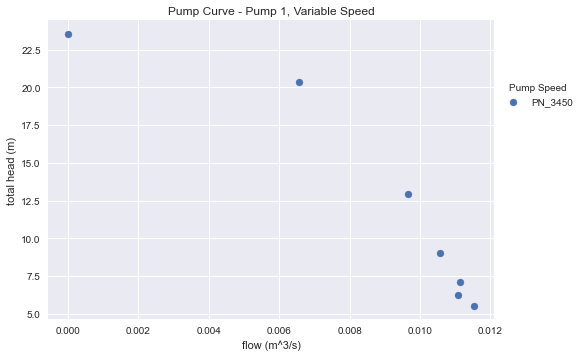

In [13]:
plotModelPumpCurve(pn_dfs, "Pump 1, Variable Speed")

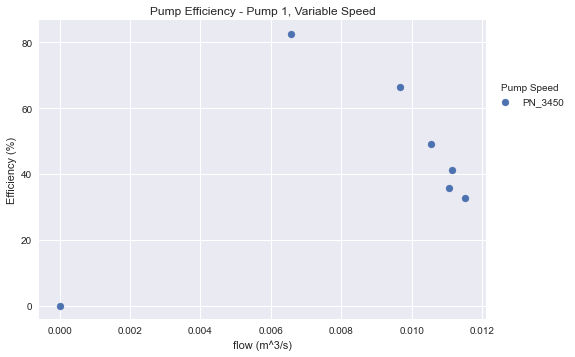

In [14]:
plotEfficiencies(pn_dfs, "Pump 1, Variable Speed")

In [15]:
def generateSystemDemand(f, L, d, Q):
    return (8*f*L)/((math.pi**2)*G*d**5)*Q**2

In [16]:
def scalePump(data, n2, d1, d2):
    dfs = {}
    for name, df in data.items():
        n1 = int(name.split("_")[1])
        new_df = pd.DataFrame(columns=["flow", "total_pump_head", "fluid_power", "efficiency", "input_power", "system_demand"])
        new_df["flow"] = df["flow_p1"].apply(lambda x: x*((d2/d1)**3)*n2/n1)
        new_df["total_pump_head"] = df["total_pump_head"].apply(lambda x: x*((n2/n1)**2)*(d2/d1)**2)
        new_df["fluid_power"] = df["fluid_power"].apply(lambda x: (((n2/n1)**3)*(d2/d1)**5)*x)
        new_df["efficiency"] = df["efficiency"].apply(lambda x: (((1-x)/((d2/d1)**(1/5)))-1)*-1)
        new_df["input_power"] = new_df["fluid_power"]/new_df["efficiency"]
        # new_df["system_demand"] = new_df["flow"].apply(lambda x: generateSystemDemand(f, L, d2, x))
        dfs[name] = new_df
    return dfs

In [17]:
def plotPumpCurve(scaledData, fullScaledSpeed, fullScaledPumpDia, cost_piping, cost_pump, f, L, pipe_diameter, motor_info, extrapolate=False, suppressGraphs=False, onlyApproved=True):
    inter_data = {"scaled_n1":[], "flow":[], "head":[]}
    for i, (name, df) in enumerate(scaledData.items()):
        n1 = int(name.split("_")[1])
        poly_func_head = Polynomial.fit(df["flow"], df["total_pump_head"], 2)
        # poly_func_sysd = Polynomial.fit(df["flow"], df["system_demand"], 2)
        poly_func_eff = Polynomial.fit(df["flow"], df["efficiency"], 2)
        if extrapolate:
            # increase maximum x-range domain to ensure intersection
            poly_xvals = np.linspace(df["flow"].min(), df["flow"].max()+(df["flow"].max()*0.20), 50)
        else:
            poly_xvals = np.linspace(df["flow"].min(), df["flow"].max(), 50)
        poly_yvals_head = poly_func_head(poly_xvals)
        # poly_yvals_sysd = poly_func_sysd(poly_xvals)
        poly_yvals_sysd = generateSystemDemand(f, L, pipe_diameter, poly_xvals)
        poly_yvals_eff = poly_func_eff(poly_xvals)
        try:
            finiteDifferences = np.diff(np.sign(poly_yvals_head - poly_yvals_sysd))
            if not np.any(finiteDifferences):
                raise ValueError(f"{i}. Pump curve and system demand curve do not intersect at scaled pump station of n1={n1}.")
            common_idx = np.argwhere(finiteDifferences).flatten()[0]
            inter_data["scaled_n1"].append(n1)
            inter_data["flow"].append(round(poly_xvals[common_idx], 3))
            inter_data["head"].append(round(poly_yvals_head[common_idx], 3))
            cur_flow = round(poly_xvals[common_idx], 3)
            cur_head = round(poly_yvals_head[common_idx], 3)
        except ValueError as err:
            print(err)
            inter_data["scaled_n1"].append(n1)
            inter_data["flow"].append(round(None))
            inter_data["head"].append(round(None))
        if not suppressGraphs:
            approval = np.zeros(3)
            approval[0] = True if cur_head < MAX_PRESSURE else False
            approval[1] = True if cur_head > MIN_PRESSURE else False
            approval[2] = True if cur_flow > MIN_FLOW else False
            if onlyApproved:
                # print(colored("min pressure - Pass!", "green")) if cur_head > MIN_PRESSURE else print(colored("min pressure - Fail!", "red"))
                # print(colored("min flow - Pass!", "green")) if cur_flow > MIN_FLOW else print(colored("min flow - Fail!", "red"))
                if approval.all():
                    showResults(df, motor_info, cost_pump, pipe_diameter, fullScaledPumpDia, i, poly_xvals, common_idx, poly_yvals_head, poly_yvals_sysd, fullScaledSpeed, n1, cur_head, cur_flow, poly_yvals_eff, cost_piping, approval)
                    return True
                else:
                    return False
            else:
                showResults(df, motor_info, cost_pump, pipe_diameter, fullScaledPumpDia, i, poly_xvals, common_idx, poly_yvals_head, poly_yvals_sysd, fullScaledSpeed, n1, cur_head, cur_flow, poly_yvals_eff, cost_piping, approval)
                return None

In [18]:
def showResults(df, motor_info, cost_pump, pipe_diameter, fullScaledPumpDia, i, poly_xvals, common_idx, poly_yvals_head, poly_yvals_sysd, fullScaledSpeed, n1, cur_head, cur_flow, poly_yvals_eff, cost_piping, approval):
    print(f"Scaled Pump Curves - Pipe Diameter = {round(pipe_diameter/IN_TO_M, 0)}in.".center(52, "-"))
    print(f"{i}. Point of intersection - flow (m^3/s):{round(poly_xvals[common_idx], 3)}, head (m): {round(poly_yvals_head[common_idx], 3)}")
    plt.scatter(df["flow"], df["total_pump_head"], color="green")
    plt.plot(poly_xvals, poly_yvals_head, label="total pump head")
    plt.plot(poly_xvals, poly_yvals_sysd, color="orange", label="system demand")
    plt.title(f"Pump Curve - Scaled Speed: {fullScaledSpeed} rpm; Model Speed: {n1}")
    plt.legend(title="Pump Speed", loc='center left', bbox_to_anchor=(1, 0.75))
    plt.ylabel("head (m)")
    plt.xlabel("flow (m^3/s)")
    plt.show()
    print(f"Satisfactory?:")
    print(colored("max pressure - Pass!", "green")) if approval[0] else print(colored("max pressure - Fail!", "red"))
    print(colored("min pressure - Pass!", "green")) if approval[1] else print(colored("min pressure - Fail!", "red"))
    print(colored("min flow - Pass!", "green")) if approval[2] else print(colored("min flow - Fail!", "red"))
    cur_water_power = round(cur_head*cur_flow*RHO*G, 2)
    cur_eff = round(poly_yvals_eff[common_idx], 3)
    cur_shaft_power = round(cur_water_power/cur_eff, 3)
    filt1_df = motor_info[motor_info["motor_speed"] == fullScaledSpeed]
    filt2_df = filt1_df[filt1_df["motor_hp"] > cur_shaft_power].sort_values(by="motor_price", ascending=True)
    if filt2_df.empty:
        bestMotor = "No such motor is available"
        bestMotorPrice = np.NaN
    else:
        bestMotor = filt2_df.iloc[0]["motor_name"]
        bestMotorPrice = filt2_df.iloc[0]["motor_price"]
    print(f"Full Scale Overview -> Pipe diameter: {round(pipe_diameter/IN_TO_M, 1)} in, Pump Speed: {fullScaledSpeed} rpm, Pump Diameter: {round(fullScaledPumpDia/IN_TO_M, 2)}in")
    print(f"Motor: {bestMotor}")
    print(f"Current Efficiency: {cur_eff}")
    print(f"Water Power: {cur_water_power}W")
    print(f"Shaft Power: {cur_shaft_power}W, {round(cur_shaft_power/HP_TO_W, 0)}hp")
    cost_power = (cur_shaft_power*24)/1000 * ENERGY_COST
    print(f"Expected total fixed costs = ${round(cost_piping+bestMotorPrice+cost_pump, 2)}")
    print(f"Expected total electricity costs = ${round(cost_power, 2)}/day")

In [19]:
def main(model_dataset, d1, pipe_diameters, n2s, d2s, motor_info, onlyApproved=True, suppressGraphs=False):
    for d2 in d2s:
        for n2 in n2s:
            for d in pipe_diameters:
                scl_dfs = scalePump(model_dataset, n2, d1, d2)
                exp_cost_piping = SCALE_PIPE_LENGTH * pipe_info.loc[d, "pipe_cost"]
                exp_cost_pump = pump_info.loc[d2, "pump_cost"]
                plotPumpCurve(scl_dfs, n2, d2, exp_cost_piping, exp_cost_pump, 0.008, SCALE_PIPE_LENGTH, d, motor_info, True, suppressGraphs, onlyApproved) # only scaling 3450

## Different Pipe Diameters

In [20]:
pipe_info

,pipe_cost
pipe_diameter,
0.1016,4.330709
0.1524,8.989501
0.2032,15.091864
0.3048,28.018373
0.3810,53.543307
0.4572,64.370079
0.6096,110.170604
0.7620,175.524934
0.9144,204.461942


In [21]:
# equivalent diameters in metres (left) and inches (right)
pipe_info.index.to_series().apply(lambda x: x/IN_TO_M)

pipe_diameter
0.1016     4.0
0.1524     6.0
0.2032     8.0
0.3048    12.0
0.3810    15.0
0.4572    18.0
0.6096    24.0
0.7620    30.0
0.9144    36.0
1.0668    42.0
1.2192    48.0
Name: pipe_diameter, dtype: float64

## Main Scaling and Testing Script

In [22]:
list(set(motor_info["motor_speed"].to_list()))

[3600, 1800, 1200]

In [23]:
pump_info.index.to_list()

[0.1143,
 0.127,
 0.1397,
 0.2159,
 0.2349,
 0.254,
 0.2603,
 0.2794,
 0.3048,
 0.3365,
 0.3556,
 0.3937,
 0.4254]

----Scaled Pump Curves - Pipe Diameter = 12.0in.----
0. Point of intersection - flow (m^3/s):0.088, head (m): 8.198


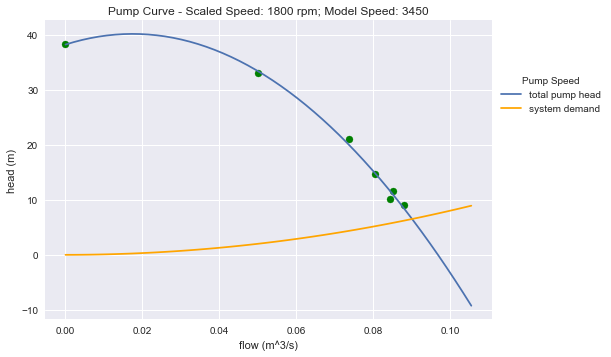

Satisfactory?:
max pressure - Pass!
min pressure - Fail!
min flow - Fail!
Full Scale Overview -> Pipe diameter: 12.0 in, Pump Speed: 1800 rpm, Pump Diameter: 11.0in
Motor: AC MOTOR 25HP 1800RPM 208-230/460VAC 3PH 284T
Current Efficiency: 0.42
Water Power: 7077.17W
Shaft Power: 16850.405W, 23.0hp
Expected total fixed costs = $92780.79
Expected total electricity costs = $31.14/day


In [24]:
main(pn_dfs, 0.1143, [0.3048], [1800], [0.2794], motor_info, False)

----Scaled Pump Curves - Pipe Diameter = 15.0in.----
0. Point of intersection - flow (m^3/s):0.316, head (m): 36.105


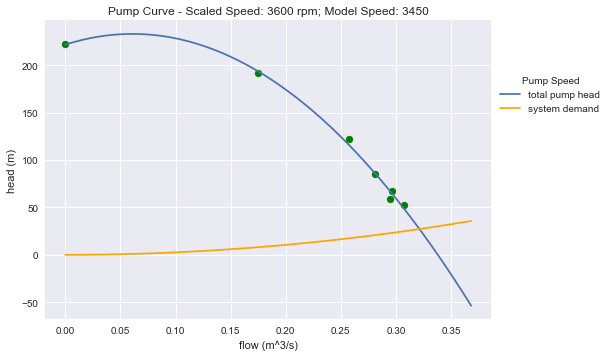

Satisfactory?:
max pressure - Pass!
min pressure - Pass!
min flow - Pass!
Full Scale Overview -> Pipe diameter: 15.0 in, Pump Speed: 3600 rpm, Pump Diameter: 13.25in
Motor: No such motor is available
Current Efficiency: 0.393
Water Power: 111924.06W
Shaft Power: 284794.046W, 382.0hp
Expected total fixed costs = $nan
Expected total electricity costs = $526.3/day
----Scaled Pump Curves - Pipe Diameter = 15.0in.----
0. Point of intersection - flow (m^3/s):0.373, head (m): 40.32


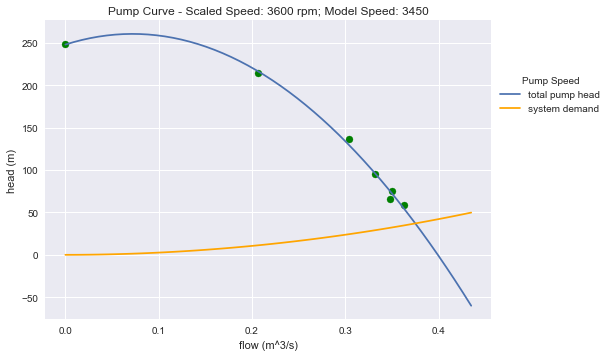

Satisfactory?:
max pressure - Pass!
min pressure - Pass!
min flow - Pass!
Full Scale Overview -> Pipe diameter: 15.0 in, Pump Speed: 3600 rpm, Pump Diameter: 14.0in
Motor: No such motor is available
Current Efficiency: 0.4
Water Power: 147536.12W
Shaft Power: 368840.3W, 495.0hp
Expected total fixed costs = $nan
Expected total electricity costs = $681.62/day
----Scaled Pump Curves - Pipe Diameter = 18.0in.----
0. Point of intersection - flow (m^3/s):0.518, head (m): 33.267


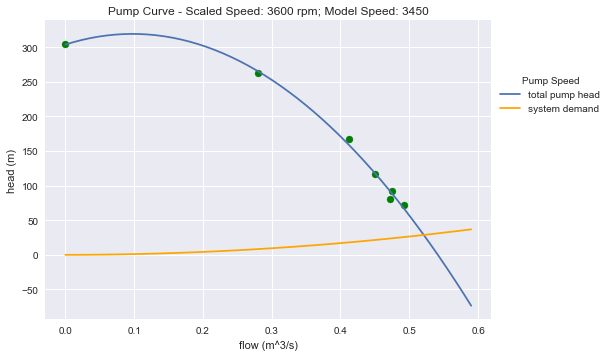

Satisfactory?:
max pressure - Pass!
min pressure - Pass!
min flow - Pass!
Full Scale Overview -> Pipe diameter: 18.0 in, Pump Speed: 3600 rpm, Pump Diameter: 15.5in
Motor: No such motor is available
Current Efficiency: 0.362
Water Power: 169048.92W
Shaft Power: 466985.967W, 626.0hp
Expected total fixed costs = $nan
Expected total electricity costs = $862.99/day
----Scaled Pump Curves - Pipe Diameter = 12.0in.----
0. Point of intersection - flow (m^3/s):0.211, head (m): 37.34


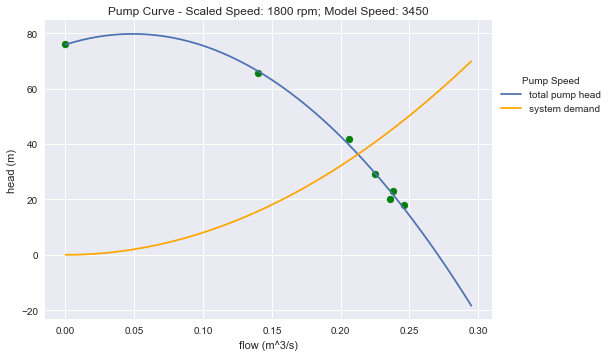

Satisfactory?:
max pressure - Pass!
min pressure - Pass!
min flow - Pass!
Full Scale Overview -> Pipe diameter: 12.0 in, Pump Speed: 1800 rpm, Pump Diameter: 15.5in
Motor: AC MOTOR 200HP 1800RPM 208-230/460VAC 3PH 445/7T
Current Efficiency: 0.688
Water Power: 77290.44W
Shaft Power: 112340.756W, 151.0hp
Expected total fixed costs = $97408.79
Expected total electricity costs = $207.61/day


In [25]:
main(pn_dfs, 0.1143, pipe_info.index.to_series(), [3600, 1800, 1200], pump_info.index.to_list(), motor_info)

In [26]:
# filt_df = motor_info[motor_info["motor_speed"] == 1800]
# filt_df[filt_df["motor_hp"] > 112340].sort_values(by="motor_price", ascending=True).iloc[0]["motor_name"]